In [1070]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('dark_background')

In [1071]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 14
mlp.rcParams['axes.titlesize'] = 16
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

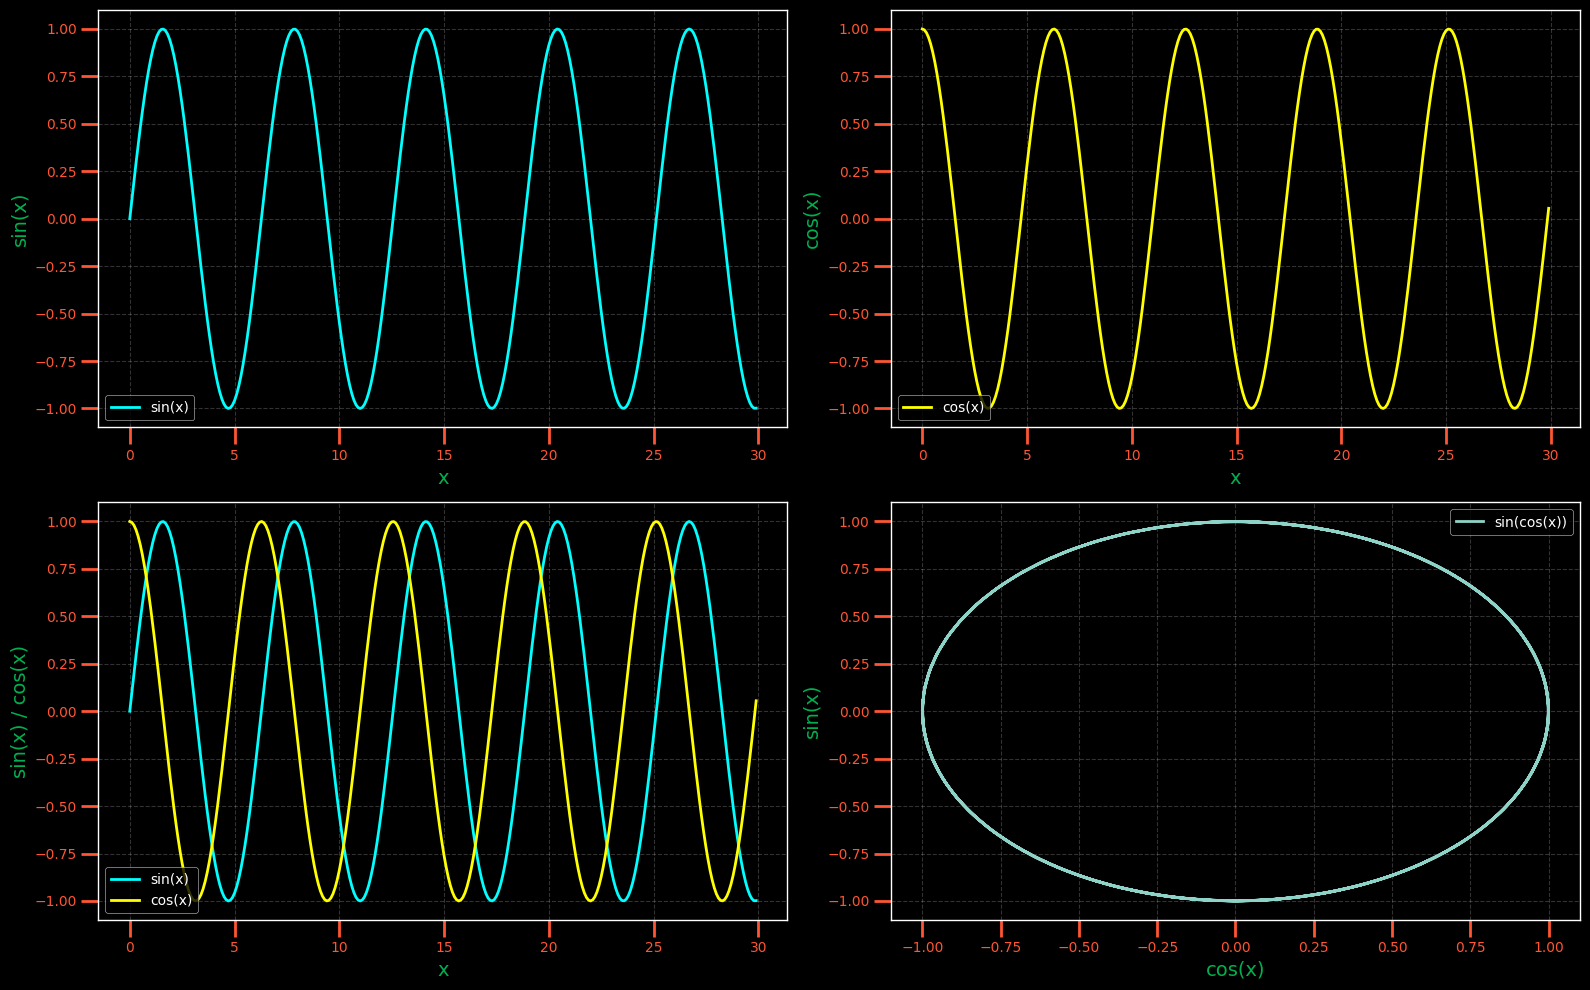

In [1072]:
X = np.arange(0, 30, 0.1)
Y = np.sin(X)
Z = np.cos(X)

fig = plt.figure()
fig.set_size_inches(16, 10)

ax1 = plt.subplot(2, 2, 1)
ax1.plot(X, Y, label='sin(x)', color='cyan')

plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(X, Z, label='cos(x)', color='yellow')

plt.xlabel("x")
plt.ylabel("cos(x)")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax3 = plt.subplot(2, 2, 3)
ax3.plot(X, Y, color='cyan', label='sin(x)')
ax3.plot(X, Z, color='yellow', label='cos(x)')

plt.xlabel("x")
plt.ylabel("sin(x) / cos(x)")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.2, linestyle='--', color='white')

ax4 = plt.subplot(2, 2, 4)
ax4.plot(Y, Z, label='sin(cos(x))')

plt.xlabel("cos(x)")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()

plt.show()

### Переобучение и недообучение

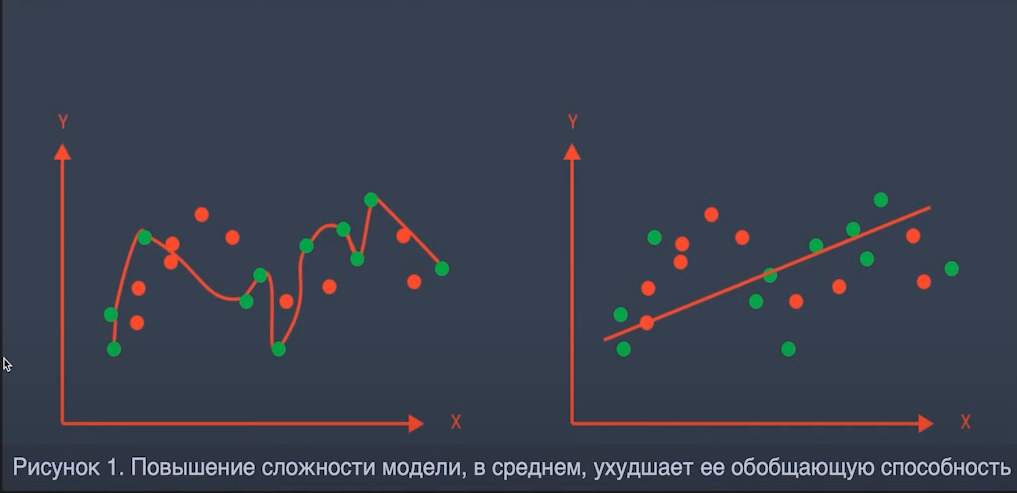

Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [1073]:
X = np.array(sorted([20*x for x in np.random.rand(120, 1)]))
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [1074]:
X_df = pd.DataFrame(X, columns=['X'])
Y_df = pd.DataFrame(Y, columns=['Y'])
df = pd.concat([X_df, Y_df], axis=1)
df.iloc[-10:]

,X,Y
110,18.281145,35.589295
111,18.325858,35.020353
112,18.366991,36.886391
113,18.374646,40.762217
114,18.773058,42.472869
115,18.806414,38.352005
116,18.887638,33.978200
117,19.045530,33.488180
118,19.851832,34.172460
119,19.929114,43.495666


In [1075]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [1076]:
# Сохраняем упорядоченные индексы наших элементов для визуализации

index_argsort = np.argsort(X_train.reshape(72,))
index_argsort

array([20, 33, 23, 17, 34, 49, 10, 68, 18, 22, 11,  5, 35, 48,  0, 19,  2,
       16, 40, 65,  1,  3, 56, 60, 15, 30, 37, 28, 58, 71, 27, 31, 44, 14,
       21, 29, 63, 53,  4, 50, 66, 67, 61, 52,  9, 36, 41, 59, 43,  8, 70,
       25, 55, 26, 45, 38, 39,  6, 32,  7, 12, 42, 69, 51, 47, 54, 46, 13,
       62, 57, 64, 24], dtype=int64)

In [1077]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

C:\Users\danil\AppData\Local\Temp\ipykernel_8748\968649235.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--g" (-> color='g'). The keyword argument will take precedence.
  ax2.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), '--g', linewidth=4, color='yellow')


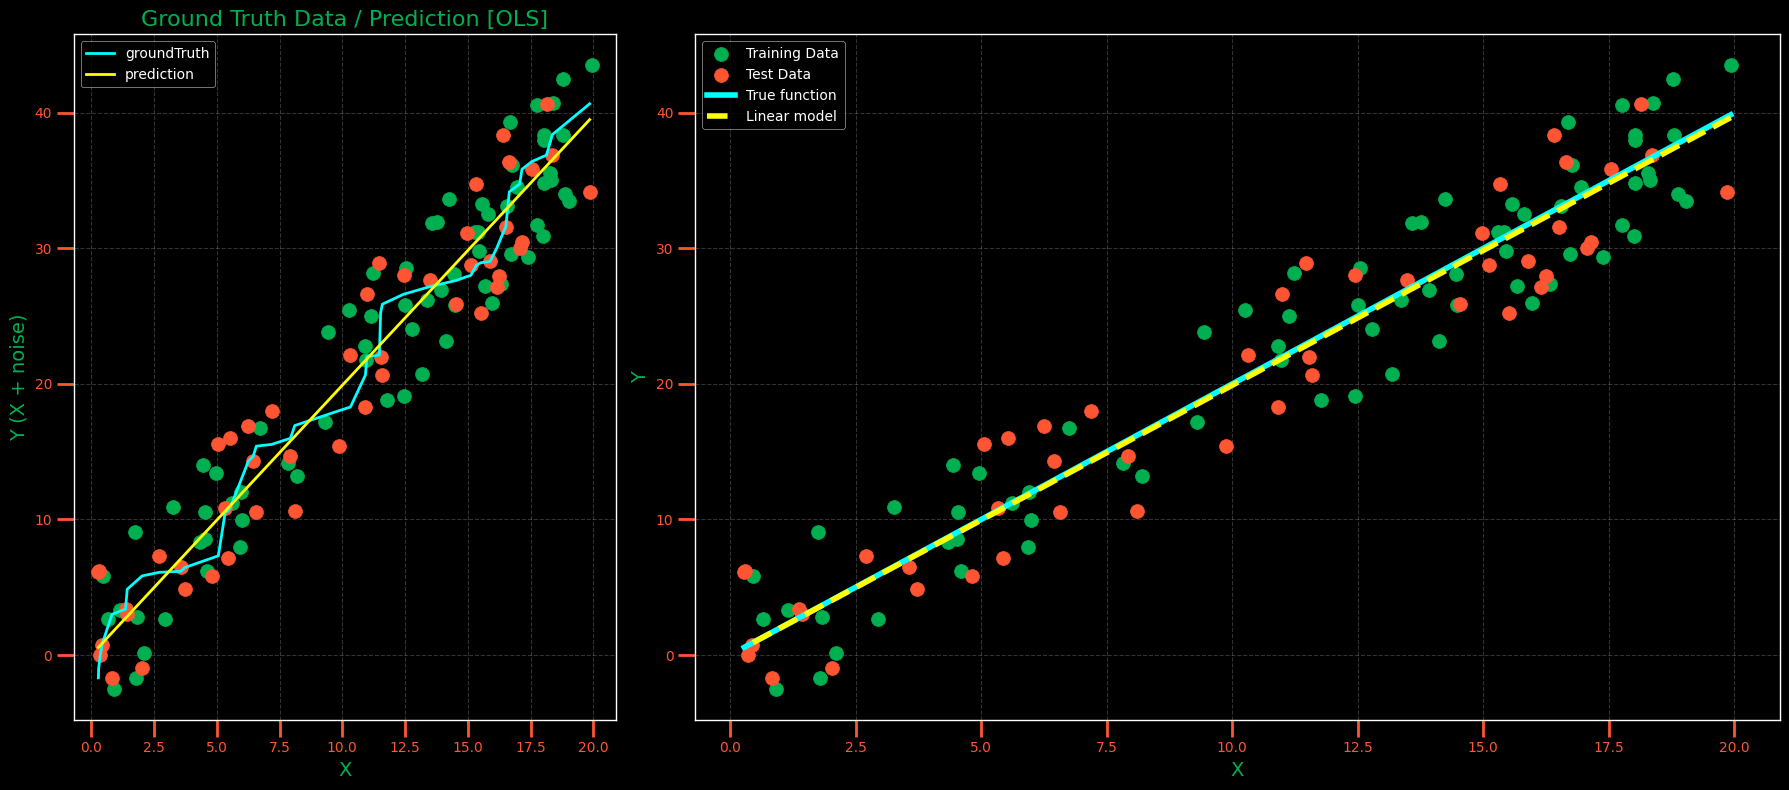

In [1078]:
prediction = pd.DataFrame(model.predict(X_test), columns = ['prediction'])
groundTruth = pd.DataFrame(Y_test, columns=['groundTruth'])
answer = pd.concat([prediction, groundTruth], axis=1)
answer['X'] = pd.DataFrame(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 2]})

ax1.set_title('Ground Truth Data / Prediction [OLS]')
ax1.scatter(X_train, Y_train, c='#00B050', s=100)
ax1.scatter(X_test, Y_test, c='#FF5533', s=100)
ax1.plot(sorted(answer['X']), sorted(answer['groundTruth']), label='groundTruth', color='cyan')
ax1.plot(sorted(answer['X']), sorted(answer['prediction']), label='prediction', color='yellow')
ax1.set_xlabel('X')
ax1.set_ylabel('Y (X + noise)')
ax1.legend()
ax1.grid(True, alpha=0.2, linestyle='--', color='white')

ax2.scatter(X_train, Y_train, c='#00B050', s=100)
ax2.scatter(X_test, Y_test, c='#FF5533', s=100)
ax2.plot(X, [2*x for x in X], 'cyan', linewidth=4)
ax2.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), '--g', linewidth=4, color='yellow')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend(['Training Data', 'Test Data', 'True function', 'Linear model'], loc='upper left')
ax2.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()
plt.show()


In [1079]:
# feature generation
X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)

In [1080]:
print(f"X_orig: {X_train.shape}; X_pol: {X_pol.shape}")

X_orig: (72, 1); X_pol: (72, 25)


In [1081]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Создание модели, включая нормализацию с помощью StandardScaler
model_pol = make_pipeline(StandardScaler(), LinearRegression())

model_pol.fit(X_pol, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

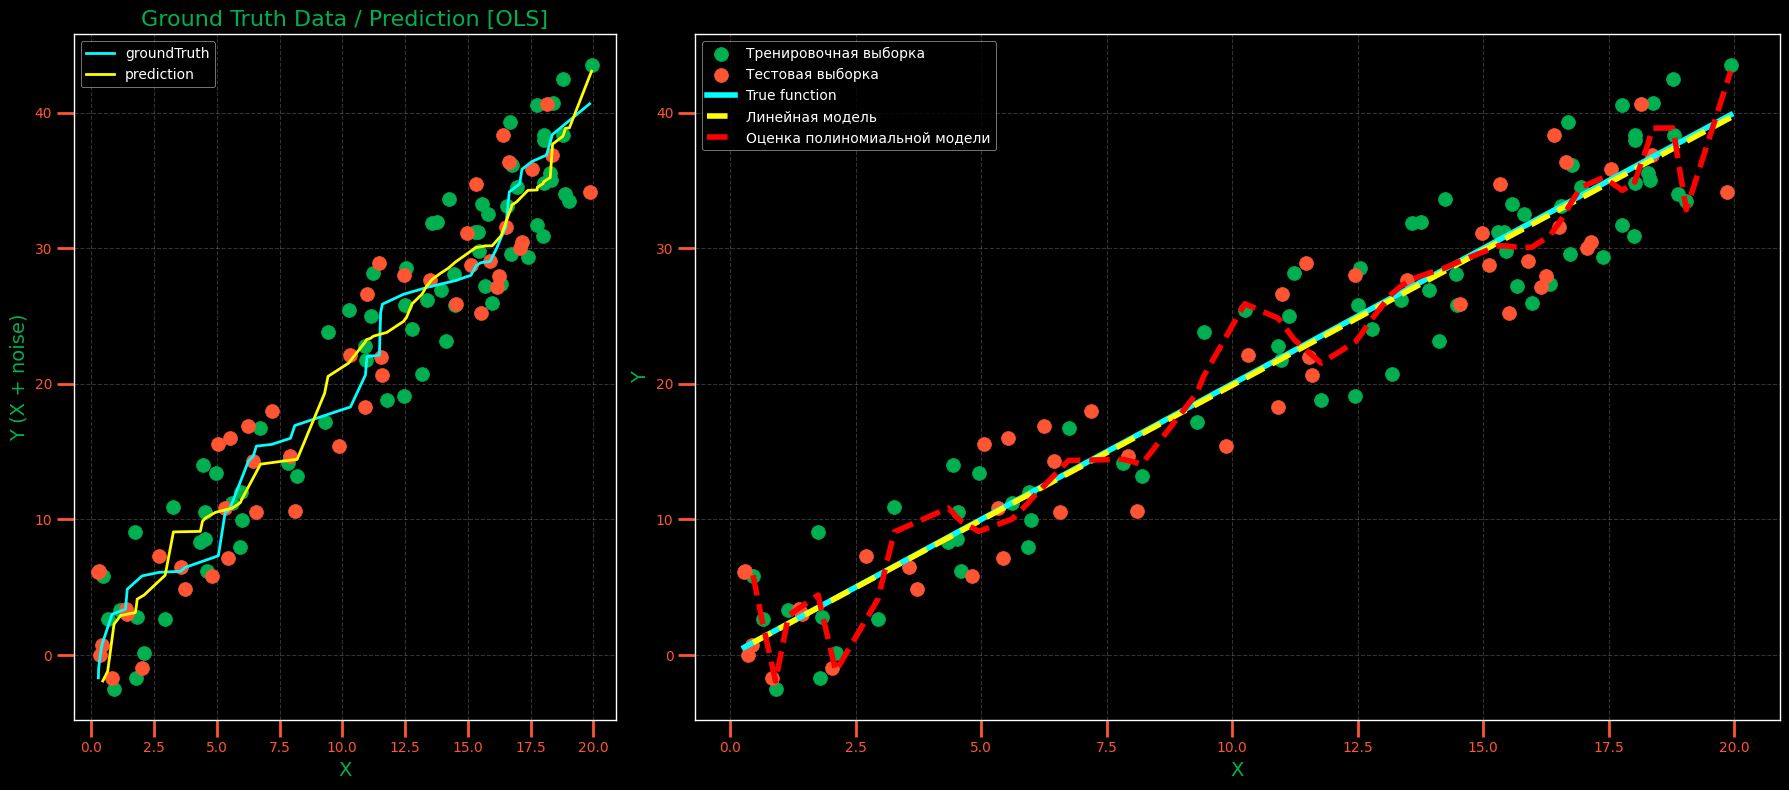

In [1082]:
prediction = pd.DataFrame(model_pol.predict(X_pol), columns = ['prediction'])
groundTruth = pd.DataFrame(Y_test, columns=['groundTruth'])
answer = pd.concat([prediction, groundTruth], axis=1)
answer['X'] = pd.DataFrame(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 2]})

ax1.set_title('Ground Truth Data / Prediction [OLS]')
ax1.scatter(X_train, Y_train, c='#00B050', s=100)
ax1.scatter(X_test, Y_test, c='#FF5533', s=100)
ax1.plot(sorted(answer['X']), sorted(answer['groundTruth']), label='groundTruth', color='cyan')
ax1.plot(X_train[index_argsort], sorted(answer['prediction']), label='prediction', color='yellow')
ax1.set_xlabel('X')
ax1.set_ylabel('Y (X + noise)')
ax1.legend()
ax1.grid(True, alpha=0.2, linestyle='--', color='white')

ax2.scatter(X_train, Y_train, c='#00B050', s=100)
ax2.scatter(X_test, Y_test, c='#FF5533', s=100)
ax2.plot(X, [2*x for x in X], 'cyan', linewidth=4)
ax2.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--', linewidth=4, color='yellow')
ax2.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
ax2.grid(True, alpha=0.2, linestyle='--', color='white')

plt.tight_layout()
plt.show()

In [1083]:
np.mean((model.predict(X_train) - Y_train)**2)

12.339275571475136

In [1084]:
np.mean((model.predict(X_test) - Y_test)**2)

12.791646422019236

In [1085]:
np.mean((model_pol.predict(X_pol) - Y_train)**2)

9.002186923269042

In [1086]:
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1), axis=1)


np.mean((model_pol.predict(X_pol_test) - Y_test)**2)

301.38398950610434

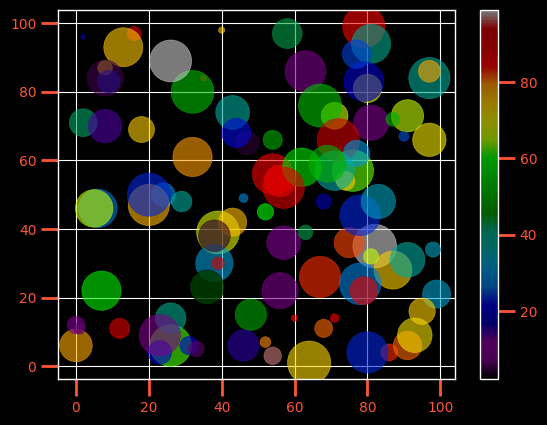

In [1087]:
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='nipy_spectral')

plt.colorbar()

plt.show()